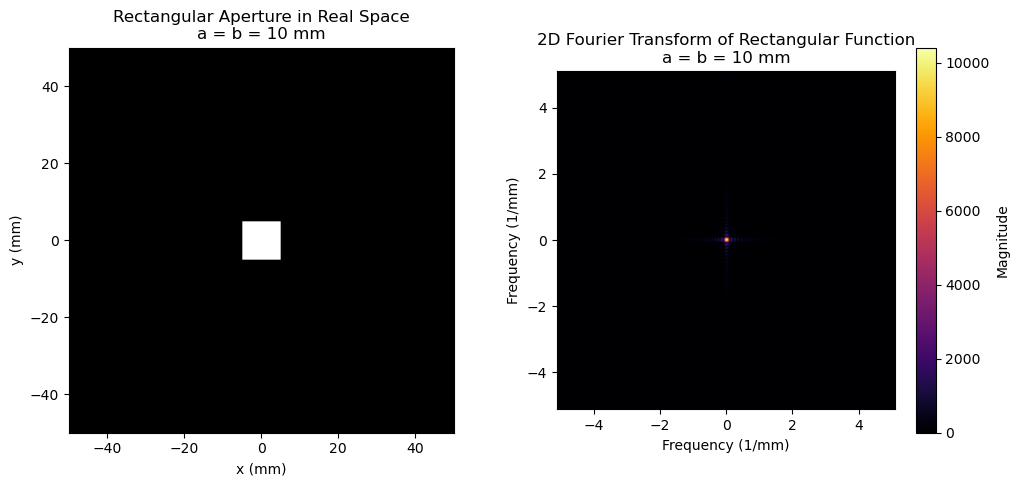

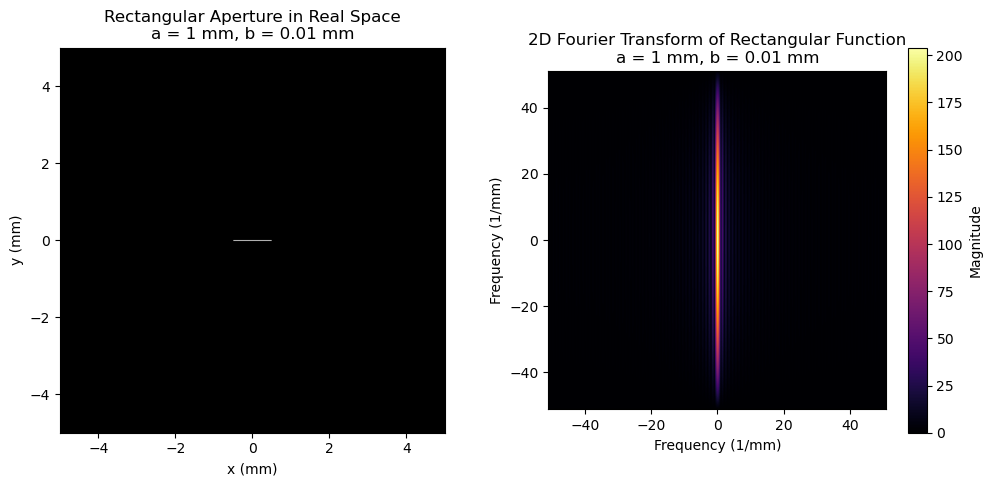

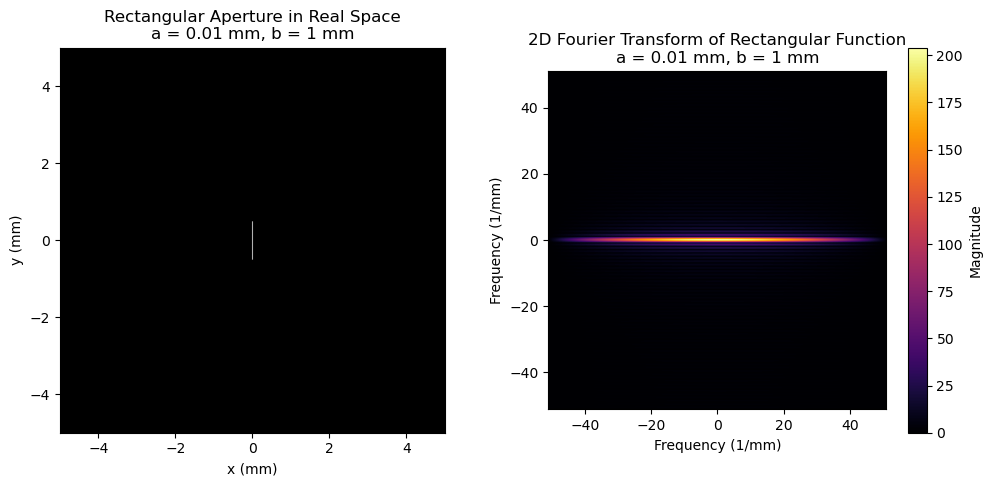

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, fftshift

def rect_2d(x, y, a, b):
    return np.where((np.abs(x) <= a / 2) & (np.abs(y) <= b / 2), 1.0, 0.0)

def fourier_transform_2d(rect):
    return fftshift(fft2(rect))

def plot_real_and_fourier_2d(a, b, title):
    N = 1024  # Resolution
    L = max(a, b) * 10  # Spatial domain
    x = np.linspace(-L/2, L/2, N)
    y = np.linspace(-L/2, L/2, N)
    X, Y = np.meshgrid(x, y)
    
    rect_function = rect_2d(X, Y, a, b)
    FT_rect = fourier_transform_2d(rect_function)
    
    # Frequency domain
    freq_x = np.fft.fftfreq(N, d=(x[1]-x[0]))
    freq_y = np.fft.fftfreq(N, d=(y[1]-y[0]))
    freq_x, freq_y = np.meshgrid(fftshift(freq_x), fftshift(freq_y))
    
    # Compute magnitude spectrum
    FT_magnitude = np.abs(FT_rect)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot real space aperture
    axes[0].imshow(rect_function, extent=[x.min(), x.max(), y.min(), y.max()], cmap='gray')
    axes[0].set_title(f'Rectangular Aperture in Real Space\n{title}')
    axes[0].set_xlabel('x (mm)')
    axes[0].set_ylabel('y (mm)')
    
    # Plot Fourier transform
    im = axes[1].imshow(FT_magnitude, extent=[freq_x.min(), freq_x.max(), freq_y.min(), freq_y.max()], cmap='inferno')
    fig.colorbar(im, ax=axes[1], label='Magnitude')
    axes[1].set_title(f'2D Fourier Transform of Rectangular Function\n{title}')
    axes[1].set_xlabel('Frequency (1/mm)')
    axes[1].set_ylabel('Frequency (1/mm)')
    
    plt.show()

# Parameters for cases
a1, b1 = 10, 10  # Case (a)
a2, b2 = 1, 1/100  # Case (b)
a3, b3 = 1/100, 1  # Case (c)

# Plot results
plot_real_and_fourier_2d(a1, b1, 'a = b = 10 mm')
plot_real_and_fourier_2d(a2, b2, 'a = 1 mm, b = 0.01 mm')
plot_real_and_fourier_2d(a3, b3, 'a = 0.01 mm, b = 1 mm')


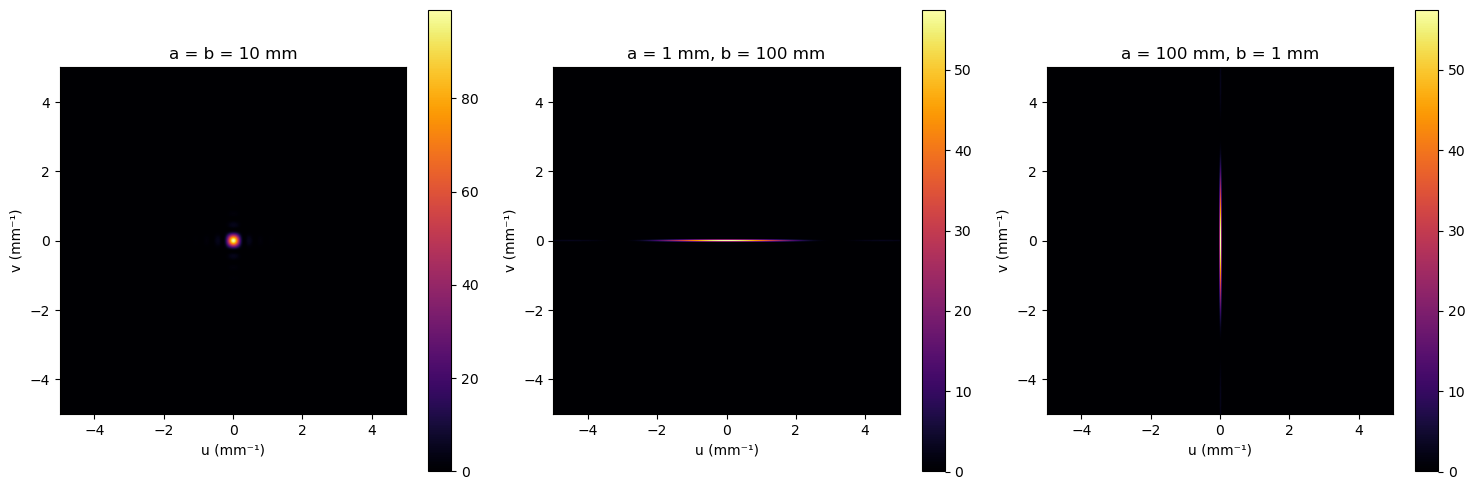

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the squared sinc function
def squared_sinc(x):
    return np.sinc(x / np.pi) ** 2  # Squared sinc function

# Define the Fourier Transform function F(u,v) for the triangular-like rect function
def fourier_transform_squared_sinc(u, v, a, b):
    return (a * b) * squared_sinc(a * u) * squared_sinc(b * v)

# Define the frequency range
u = np.linspace(-5, 5, 400)
v = np.linspace(-5, 5, 400)
U, V = np.meshgrid(u, v)

# Define cases
cases = [
    (10, 10, "a = b = 10 mm"),
    (1, 100, "a = 1 mm, b = 100 mm"),
    (100, 1, "a = 100 mm, b = 1 mm")
]

# Plot results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, (a, b, title) in zip(axes, cases):
    F = fourier_transform_squared_sinc(U, V, a, b)
    im = ax.imshow(np.abs(F), extent=[-5, 5, -5, 5], origin="lower", cmap="inferno")
    ax.set_title(title)
    ax.set_xlabel("u (mm⁻¹)")
    ax.set_ylabel("v (mm⁻¹)")
    fig.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()